In [1]:
import cv2

In [38]:
img = cv2.imread('img3.jpeg')

In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install deepface

In [5]:
from deepface import DeepFace

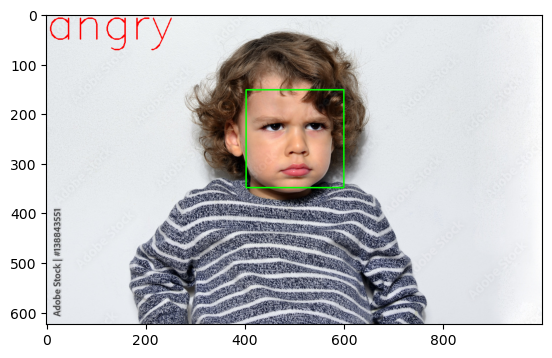

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [40]:
prediction = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]  


In [22]:
prediction

[{'emotion': {'angry': 79.53189367436096,
   'disgust': 5.790821372958123e-14,
   'fear': 0.012788467644177246,
   'happy': 0.11903418017213704,
   'sad': 5.916103308332361,
   'surprise': 2.564781617521527e-05,
   'neutral': 14.420156409759093},
  'dominant_emotion': 'angry',
  'region': {'x': 399,
   'y': 152,
   'w': 205,
   'h': 205,
   'left_eye': (538, 226),
   'right_eye': (459, 226)},
  'face_confidence': 0.93,
  'age': 28,
  'gender': {'Woman': 0.3756152465939522, 'Man': 99.62438344955444},
  'dominant_gender': 'Man',
  'race': {'asian': 7.7639855444431305,
   'indian': 5.649371817708015,
   'black': 1.3874226249754429,
   'white': 33.089762926101685,
   'middle eastern': 19.436146318912506,
   'latino hispanic': 32.67330825328827},
  'dominant_race': 'white'}]

In [41]:
prediction[0]['dominant_emotion']

'angry'

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [44]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for
# inserting text on video
cv2.putText(img,
            prediction[0]['dominant_emotion'],
            (0, 50),
            font, 3,
            (0, 0, 255),
            2,
            cv2.LINE_4 );

# Real Video capturing 

In [48]:
import cv2
from deepface import DeepFace

# Load the face cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    try:
        # Analyze the frame for emotion (skip if no face detected)
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
    except Exception as e:
        dominant_emotion = "No Face"

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Put text of the emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, dominant_emotion, (50, 50), font, 1.5, (0, 0, 255), 2, cv2.LINE_4)

    # Show the frame
    cv2.imshow('Emotion Recognition', frame)

    # Break loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
